In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp

In [2]:
dataf_edges = pd.read_csv('./table_output_allxall_name_added.csv',index_col=0)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
dataf_edges.head()

mem1  \
0  /home/basantab/NTF2_project/20190710_all_vs_de...   
1  /home/basantab/NTF2_project/20190710_all_vs_de...   
2  /home/basantab/NTF2_project/20190710_all_vs_de...   
3  /home/basantab/NTF2_project/20190710_all_vs_de...   
4  /home/basantab/NTF2_project/20190710_all_vs_de...   

                                                mem2    fTM     TM    TM1  \
0  /home/basantab/NTF2_project/20190710_all_vs_de...  0.874  0.900  0.914   
1  /home/basantab/NTF2_project/20190710_all_vs_de...  0.646  0.739  0.775   
2  /home/basantab/NTF2_project/20190710_all_vs_de...  0.677  0.725  0.773   
3  /home/basantab/NTF2_project/20190710_all_vs_de...  0.758  0.840  0.881   
4  /home/basantab/NTF2_project/20190710_all_vs_de...  0.606  0.708  0.823   

   RMSD        name1        name2  
0  1.33  nat_d1gy7a_  nat_d1gy6a_  
1  2.66  nat_d1hkxa_  nat_d1gy6a_  
2  2.32  nat_d1idpa_  nat_d1gy6a_  
3  1.94  nat_d1jkga_  nat_d1gy6a_  
4  2.30  nat_d1jkgb_  nat_d1gy6a_

In [4]:
def getname(name):
    base = name.split('/')[-1]
    if '.ent' in base:
        return 'nat_' + base.split('.')[0]
    else:
        return 'den_' + base.split('_')[0]

In [5]:
decoyf = open('./decoy_list.txt','r')
decoy_names_dict = { getname(i):n for n,i in enumerate( [ j[:-1] for j in decoyf.readlines() ] ) }
decoyf.close()

names = [ i for i in decoy_names_dict.keys() ]

In [6]:
distance_matrix = np.loadtxt('./distance_mtx.csv', delimiter=',')
print(distance_matrix[:9,:9])

[[0.    0.1   0.261 0.275 0.16  0.292 0.268 0.277 0.344]
 [0.1   0.    0.255 0.287 0.183 0.274 0.259 0.286 0.332]
 [0.261 0.255 0.    0.291 0.312 0.36  0.369 0.377 0.356]
 [0.275 0.287 0.291 0.    0.307 0.363 0.335 0.349 0.355]
 [0.16  0.183 0.312 0.307 0.    0.329 0.297 0.315 0.395]
 [0.292 0.274 0.36  0.363 0.329 0.    0.381 0.38  0.408]
 [0.268 0.259 0.369 0.335 0.297 0.381 0.    0.324 0.428]
 [0.277 0.286 0.377 0.349 0.315 0.38  0.324 0.    0.399]
 [0.344 0.332 0.356 0.355 0.395 0.408 0.428 0.399 0.   ]]


In [7]:
features = pd.read_csv('./complete_df_for_plotting.csv',index_col=0)
features['native'] = np.array(['nat_' in i for i in features.index])
features.tail()

shoot  short_arm  long_arm_ang       dist  base  \
den_ZLXCRACL  48.852833          1     48.193951  25.218239     5   
den_ZPKJGTUN  46.901508          1     44.582173  23.458285     5   
den_ZSGYHYVU  35.768540          1     55.989102  24.369879     5   
den_ZSLFGRXI  38.532080          1     54.351508  28.185086     5   
den_ZXIDTIFR  61.203019          1     35.740986  26.185375     5   

              main_bulge_curve  long_arm  sheet_type      prot  len  \
den_ZLXCRACL                 2         3          33 -1.808690  138   
den_ZPKJGTUN                 3         3          41 -1.910742  126   
den_ZSGYHYVU                 2         3          36 -2.932074  140   
den_ZSLFGRXI                 2         3          36 -5.416544  123   
den_ZXIDTIFR                 2         3          33 -1.001782  127   

              sec_bulge                                               path  \
den_ZLXCRACL          1  /home/basantab/NTF2_project/20181119_Generativ...   
den_ZPKJGTUN          0  /home/basantab/NTF2_project/20181119_Generativ...   
den_ZSGYHYVU          0  /home/basantab/NTF2_project/20181119_Generativ...   
den_ZSLFGRXI          0  /home/basantab/NTF2_project/20181119_Generativ...   
den_ZXIDTIFR          1  /home/basantab/NTF2_project/20181119_Generativ...   

                      x          y  native  
den_ZLXCRACL -28.288979  17.279175   False  
den_ZPKJGTUN   5.749352  45.101654   False  
den_ZSGYHYVU -22.936022  25.320213   False  
den_ZSLFGRXI -23.614771   2.250801   False  
den_ZXIDTIFR  -0.112347  43.525578   False

In [8]:
import json

def getname(name):
    base = name.split('/')[-1]
    if '.ent' in base:
        return 'nat_' + base.split('.')[0]
    else:
        return 'den_' + base.split('_')[0]

def get_additional_features(path):
    name = getname(path)
    if 'nat_' not in name:
        shakes = open(path, "r")
        for line in shakes.readlines():
            if 'BENTF2DICT' in line:
                bentf2dict = json.loads(' '.join(line.split()[1:]))
                shakes.close()
                # "H3", "hairpin", "Opening_is_classic", "has_cHelix", "H1"
                return np.array([bentf2dict["ring_dict"]["h_len"],\
                    bentf2dict["ring_dict"]["hairpin_len"],\
                    ("Classic"==bentf2dict["Opening"]),\
                    bentf2dict["has_cHelix"],\
                    bentf2dict["h1_len"]])
    else: return np.array([0,0,0,0,0])

print(get_additional_features(features.loc['den_ZLXCRACL'].path))    

[15  6  1  1 23]


In [9]:
new_features = np.array([ get_additional_features(features.loc[i].path) for i in features.index])

In [10]:
all_features = features.assign(H3=new_features[:,0],hairpin=new_features[:,1],\
                Opening_is_classic=new_features[:,2], has_cHelix=new_features[:,3],\
                H1=new_features[:,4])

In [11]:
import umap

In [12]:
all_stability_scores = pd.read_csv('../ProteaseAnalysisExp2/final_stability_scores_all.csv',index_col=0)
designs = [i for i in all_stability_scores.index if (('tlc' not in i) and ('scr' not in i) and ('grc' not in i) and ('m' not in i) and ('d' not in i))]
design_stability_scores = all_stability_scores.loc[designs].dropna()

# Don't forget to untar this directory!
design_directory = '../ProteaseAnalysisExp2/PDBs_from_ordered_designs'
design_file_dict = {i:glob.glob(design_directory+'/%s*.pdb'%i)[0] for i in design_stability_scores.index}

from PrintUniqueBeNTF2_file_input import *

NTF2_dicts_store = {}
dict_type = 0
design_dicts = {}
for des,fname in all_features[all_features.index.str.contains('den_')].path.to_dict().items():
    NTF2_dict = get_dict_fname(fname)
    assert sum([ compare_BeNTF2Dict(NTF2_dict,target) for target in NTF2_dicts_store.values()]) <= 1
    if not any([ compare_BeNTF2Dict(NTF2_dict,target) for target in NTF2_dicts_store.values()]):
        dict_type += 1
        NTF2_dicts_store[dict_type] = NTF2_dict
        design_dicts[des] = dict_type
    else:
        design_dicts[des] = [  val for val,target in NTF2_dicts_store.items() if compare_BeNTF2Dict(NTF2_dict,target) ][0]
        assert compare_BeNTF2Dict(NTF2_dict,NTF2_dicts_store[design_dicts[des]])
        
tested_designs = pd.DataFrame.from_dict(design_file_dict,orient='index',columns=['path'])
tested_designs['stability'] = np.array([ design_stability_scores.stability_sc.loc[i] for i in tested_designs.index ])

all_features['type'] = np.array( [ 0 if 'nat_' in i else design_dicts[i] for i in all_features.index ] )

NTF2_types = []


for des in tested_designs.index:
    fname = tested_designs.loc[des].path
    NTF2_dict = get_dict_fname(fname)
    no_match = True
    for k in NTF2_dicts_store.keys():
        if compare_BeNTF2Dict(NTF2_dict,NTF2_dicts_store[k]):
            if (des == 'JZXIQIRH') or (des == 'KVGAMRYX'):
                if des == 'JZXIQIRH':
                    print("MC2_7: %s is %s"%(des,k))
                else:
                    print("CAV1: %s is %s"%(des,k))
            NTF2_types.append(k)
            no_match = False
            break
    if no_match:
        NTF2_types.append(-1)
        print("No match: %s"%des)

tested_designs['type'] = np.array(NTF2_types)

stable_designs = tested_designs.where(tested_designs['stability'] > 1.55).dropna()

/home/basantab/NTF2Gen/BeNTF2_toolkit.py:9: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta import *


No match: KYXCXNXI
MC2_7: JZXIQIRH is 140
No match: QCNGVSNJ
No match: IMKUHIYQ
No match: LRVQLXCO
No match: ABTHEYAH
CAV1: KVGAMRYX is 1
No match: AWPIZMPF
No match: XBSQWRVM
No match: GBWOTVKO
No match: MXKBGKOL
No match: ZYUQPEXE
No match: DGVDPBYQ
No match: AFUBUPIX
No match: TMGWJCBD
No match: ZQXJPXAR
No match: MSHSBHEL
No match: RWFFHUWF
No match: ZKAFXXAJ
No match: ZWOIFRYY
No match: MDSKZUWE
No match: XRRHKKIV
No match: AISMDEPS


In [13]:
types_in_stable = set(stable_designs.type.values)
all_features['has_stable_member'] = np.array( [ ( i in types_in_stable ) for i in all_features.type ] )
types_in_tested = set(tested_designs.type.values)
all_features['has_tested_member'] = np.array( [ ( i in types_in_tested ) for i in all_features.type ] )

print("Number of stable subtypes: %i"%sum(all_features.has_stable_member))
display(all_features.loc[all_features.type==1]) # CAV1
display(all_features.loc[all_features.type==140]) #MC2_7

Number of stable subtypes: 233


shoot  short_arm  long_arm_ang       dist  base  \
den_AAADACGD  36.973614          2    106.254605  19.999775     3   

              main_bulge_curve  long_arm  sheet_type      prot  len  ...  \
den_AAADACGD                 3         2           4 -8.923871  107  ...   

                      y native  H3  hairpin  Opening_is_classic  has_cHelix  \
den_AAADACGD -40.688496  False  11        4                   1           0   

              H1  type  has_stable_member  has_tested_member  
den_AAADACGD  19     1               True               True  

[1 rows x 23 columns]

shoot  short_arm  long_arm_ang      dist  base  \
den_AJALODPD  63.219027          1     38.306408  22.65642     5   

              main_bulge_curve  long_arm  sheet_type      prot  len  ...  \
den_AJALODPD                 3         3          40  0.248505  119  ...   

                      y native  H3  hairpin  Opening_is_classic  has_cHelix  \
den_AJALODPD  40.639839  False  14        6                   1           0   

              H1  type  has_stable_member  has_tested_member  
den_AJALODPD  19   140               True               True  

[1 rows x 23 columns]

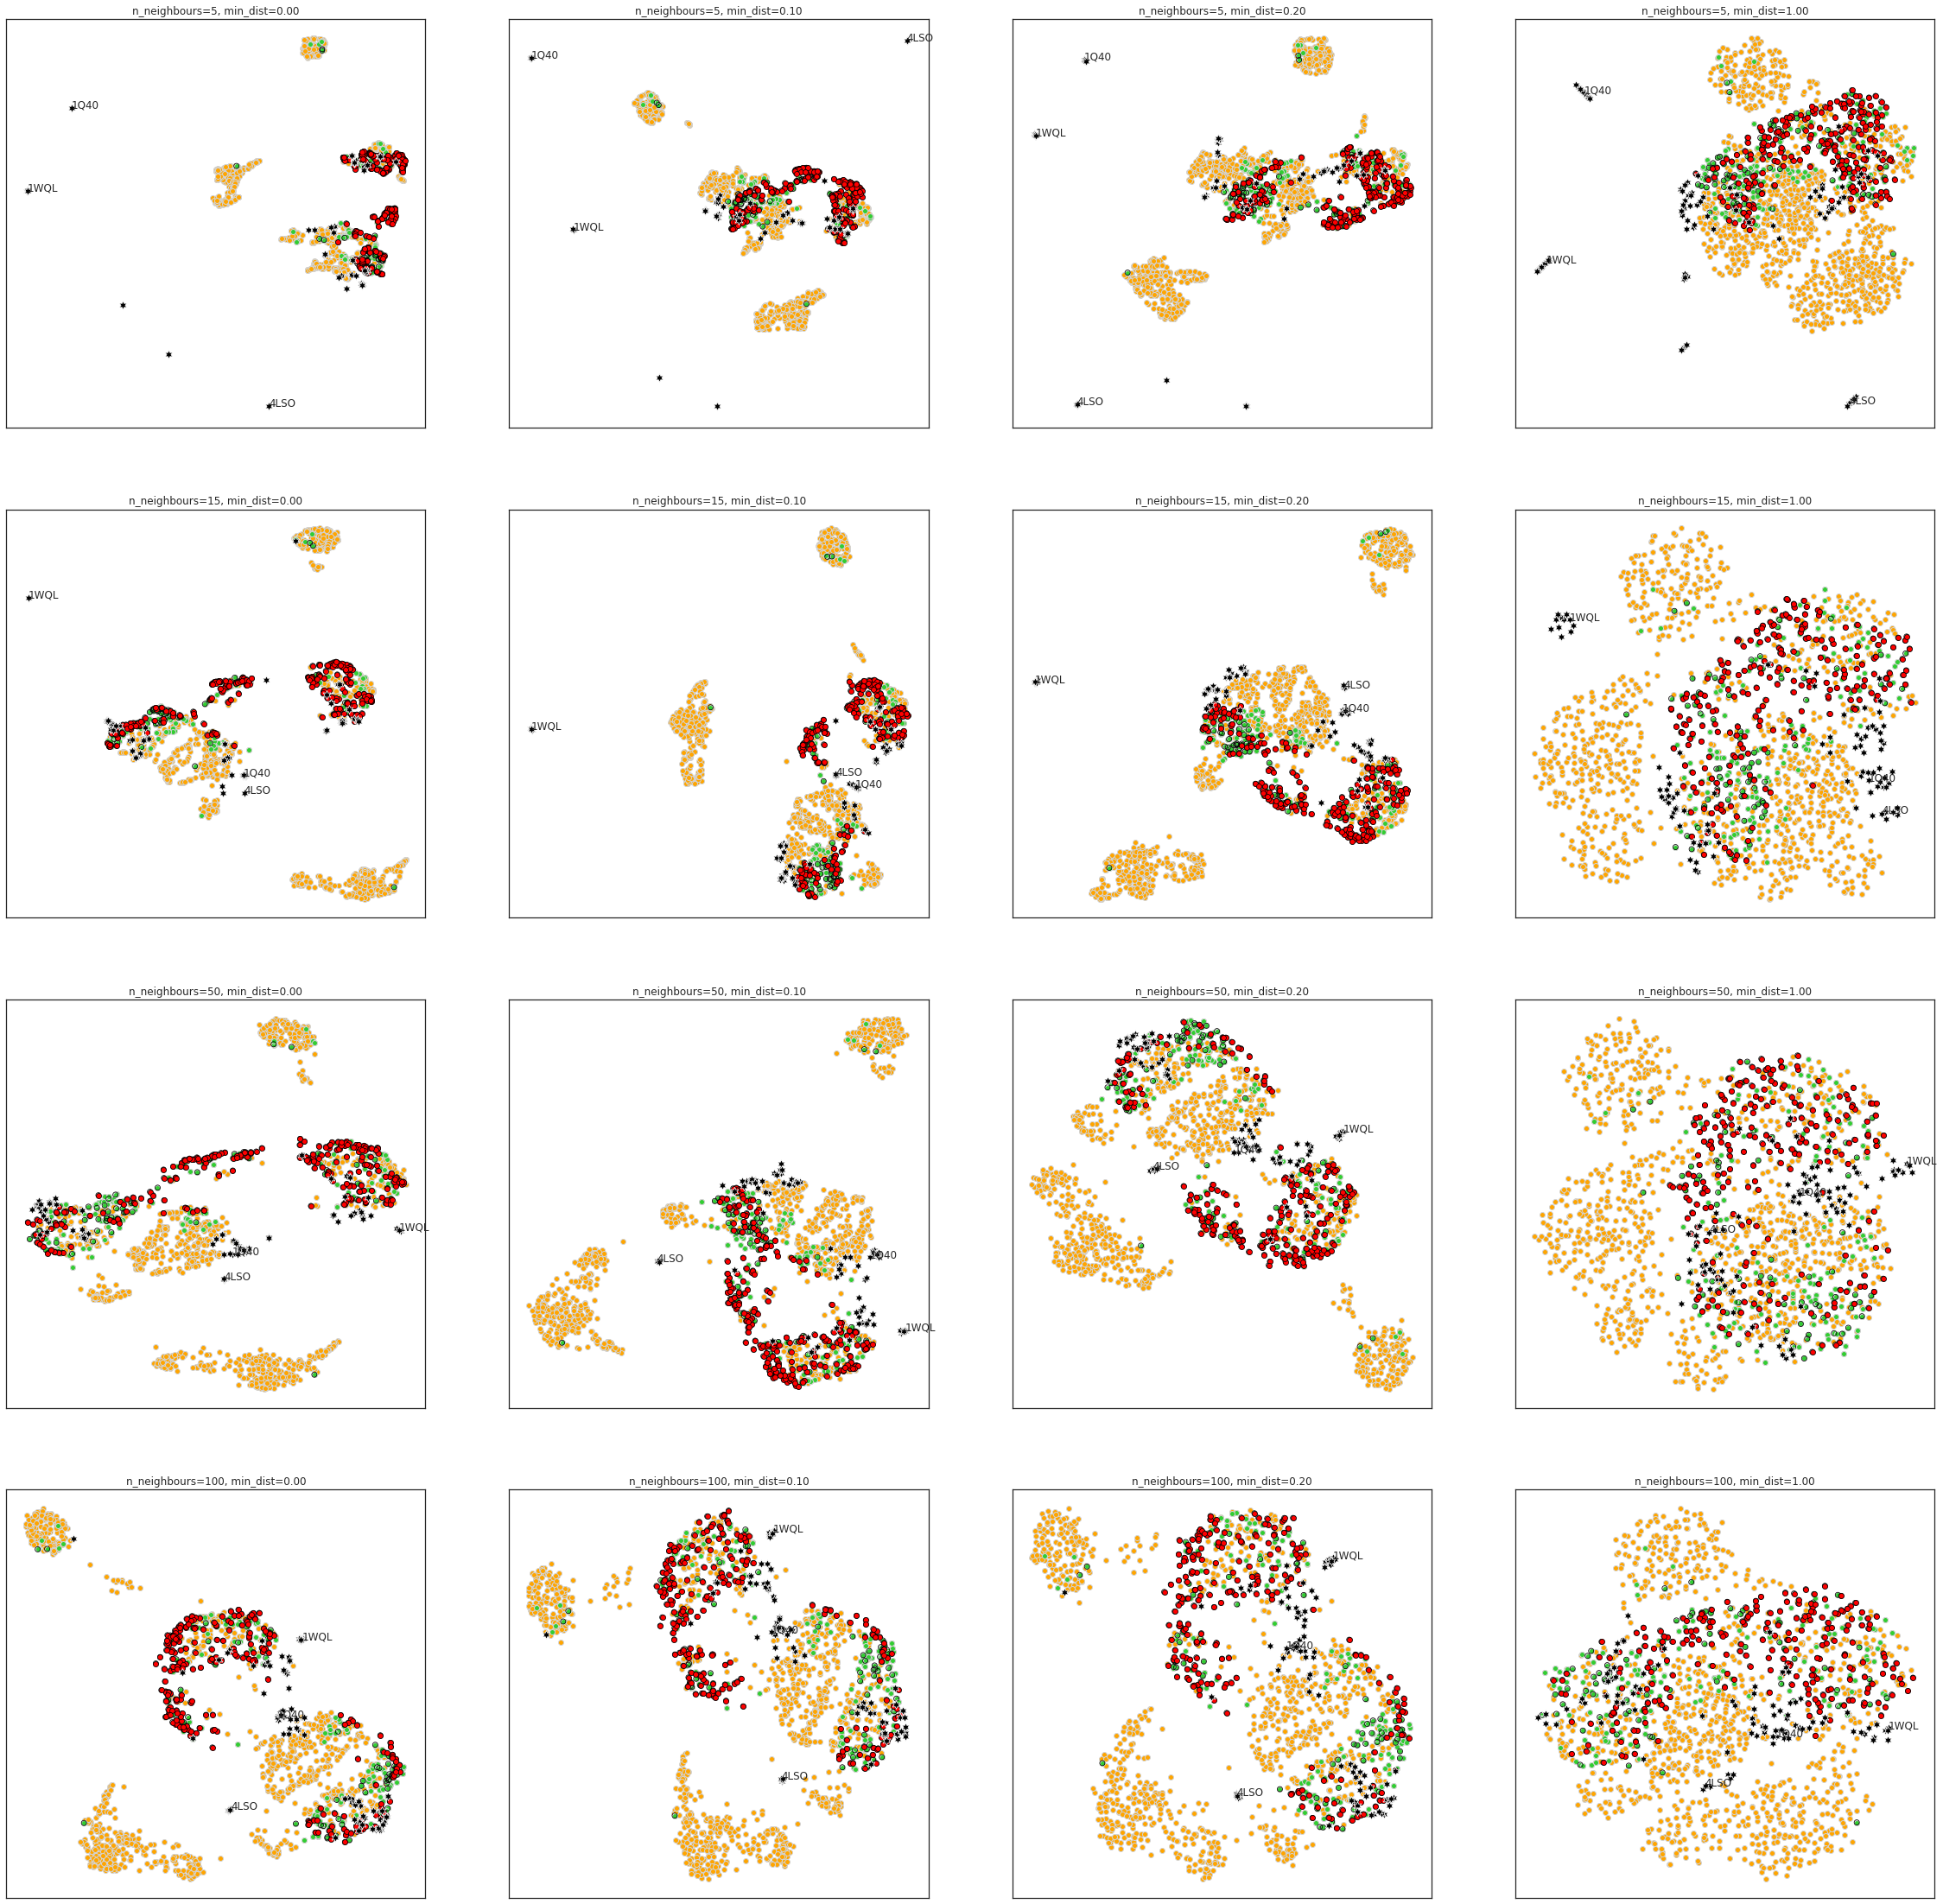

In [24]:
n_neigh_list = [5,15,50,100]
min_dist_list = [ 0, 0.1, 0.2, 1.0]

fig, ax = plt.subplots(4,4,figsize=(40, 40))
for i in range(4):
    for j in range(4):
        p = n_neigh_list[i]
        l = min_dist_list[j]
        reducer = umap.UMAP(metric='precomputed', min_dist=l, n_neighbors=p, random_state=1, init='random')
        embedding = reducer.fit_transform(distance_matrix)
        all_features['emb_umap_x'] = embedding[:,0]
        all_features['emb_umap_y'] = embedding[:,1]
        dn = all_features.where(all_features.native != True).dropna()
        na = all_features.where(all_features.native == True).dropna()
        vmin = min(dn.len.values)
        vmax = max(dn.len.values)
        
        ax[i][j].scatter(dn.emb_umap_x, dn.emb_umap_y, c='orange', marker='o',edgecolors='lightgrey' )
        ax[i][j].scatter(dn.where(dn.len<=120).dropna().emb_umap_x, \
            dn.where(dn.len<=120).dropna().emb_umap_y,\
            marker='o', facecolors='limegreen', edgecolors='lightgrey' )
        ax[i][j].scatter(dn.where(dn.has_tested_member == True).dropna().emb_umap_x, \
            dn.where(dn.has_tested_member == True).dropna().emb_umap_y,\
            c='none',marker='o', facecolors='none', edgecolors='black',linewidth=0.75 )
        ax[i][j].scatter(dn.where(dn.has_stable_member == True).dropna().emb_umap_x, \
            dn.where(dn.has_stable_member == True).dropna().emb_umap_y, vmin=vmin,\
            vmax=vmax, marker='o',facecolor='red'\
            , edgecolors='black',linewidth=0.75 )
        ax[i][j].scatter(na.emb_umap_x, na.emb_umap_y, marker=(6,1,0), s=100, linewidth=0.75,\
            facecolors='black', edgecolors='white' )
        ax[i][j].annotate('4LSO', (na.loc['nat_d4lsoa_'].emb_umap_x, na.loc['nat_d4lsoa_'].emb_umap_y))
        ax[i][j].annotate('1WQL', (na.loc['nat_d1wqlb1'].emb_umap_x, na.loc['nat_d1wqlb1'].emb_umap_y))
        ax[i][j].annotate('1Q40', (na.loc['nat_d1q40a_'].emb_umap_x, na.loc['nat_d1q40a_'].emb_umap_y))
        ax[i][j].title.set_text('n_neighbours=%d, min_dist=%0.2f'%(p,l))
        ax[i][j].set_yticklabels([])
        ax[i][j].set_xticklabels([])
plt.savefig('./explore_umap_embedding_final_colors.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', transparent=True)
plt.show()


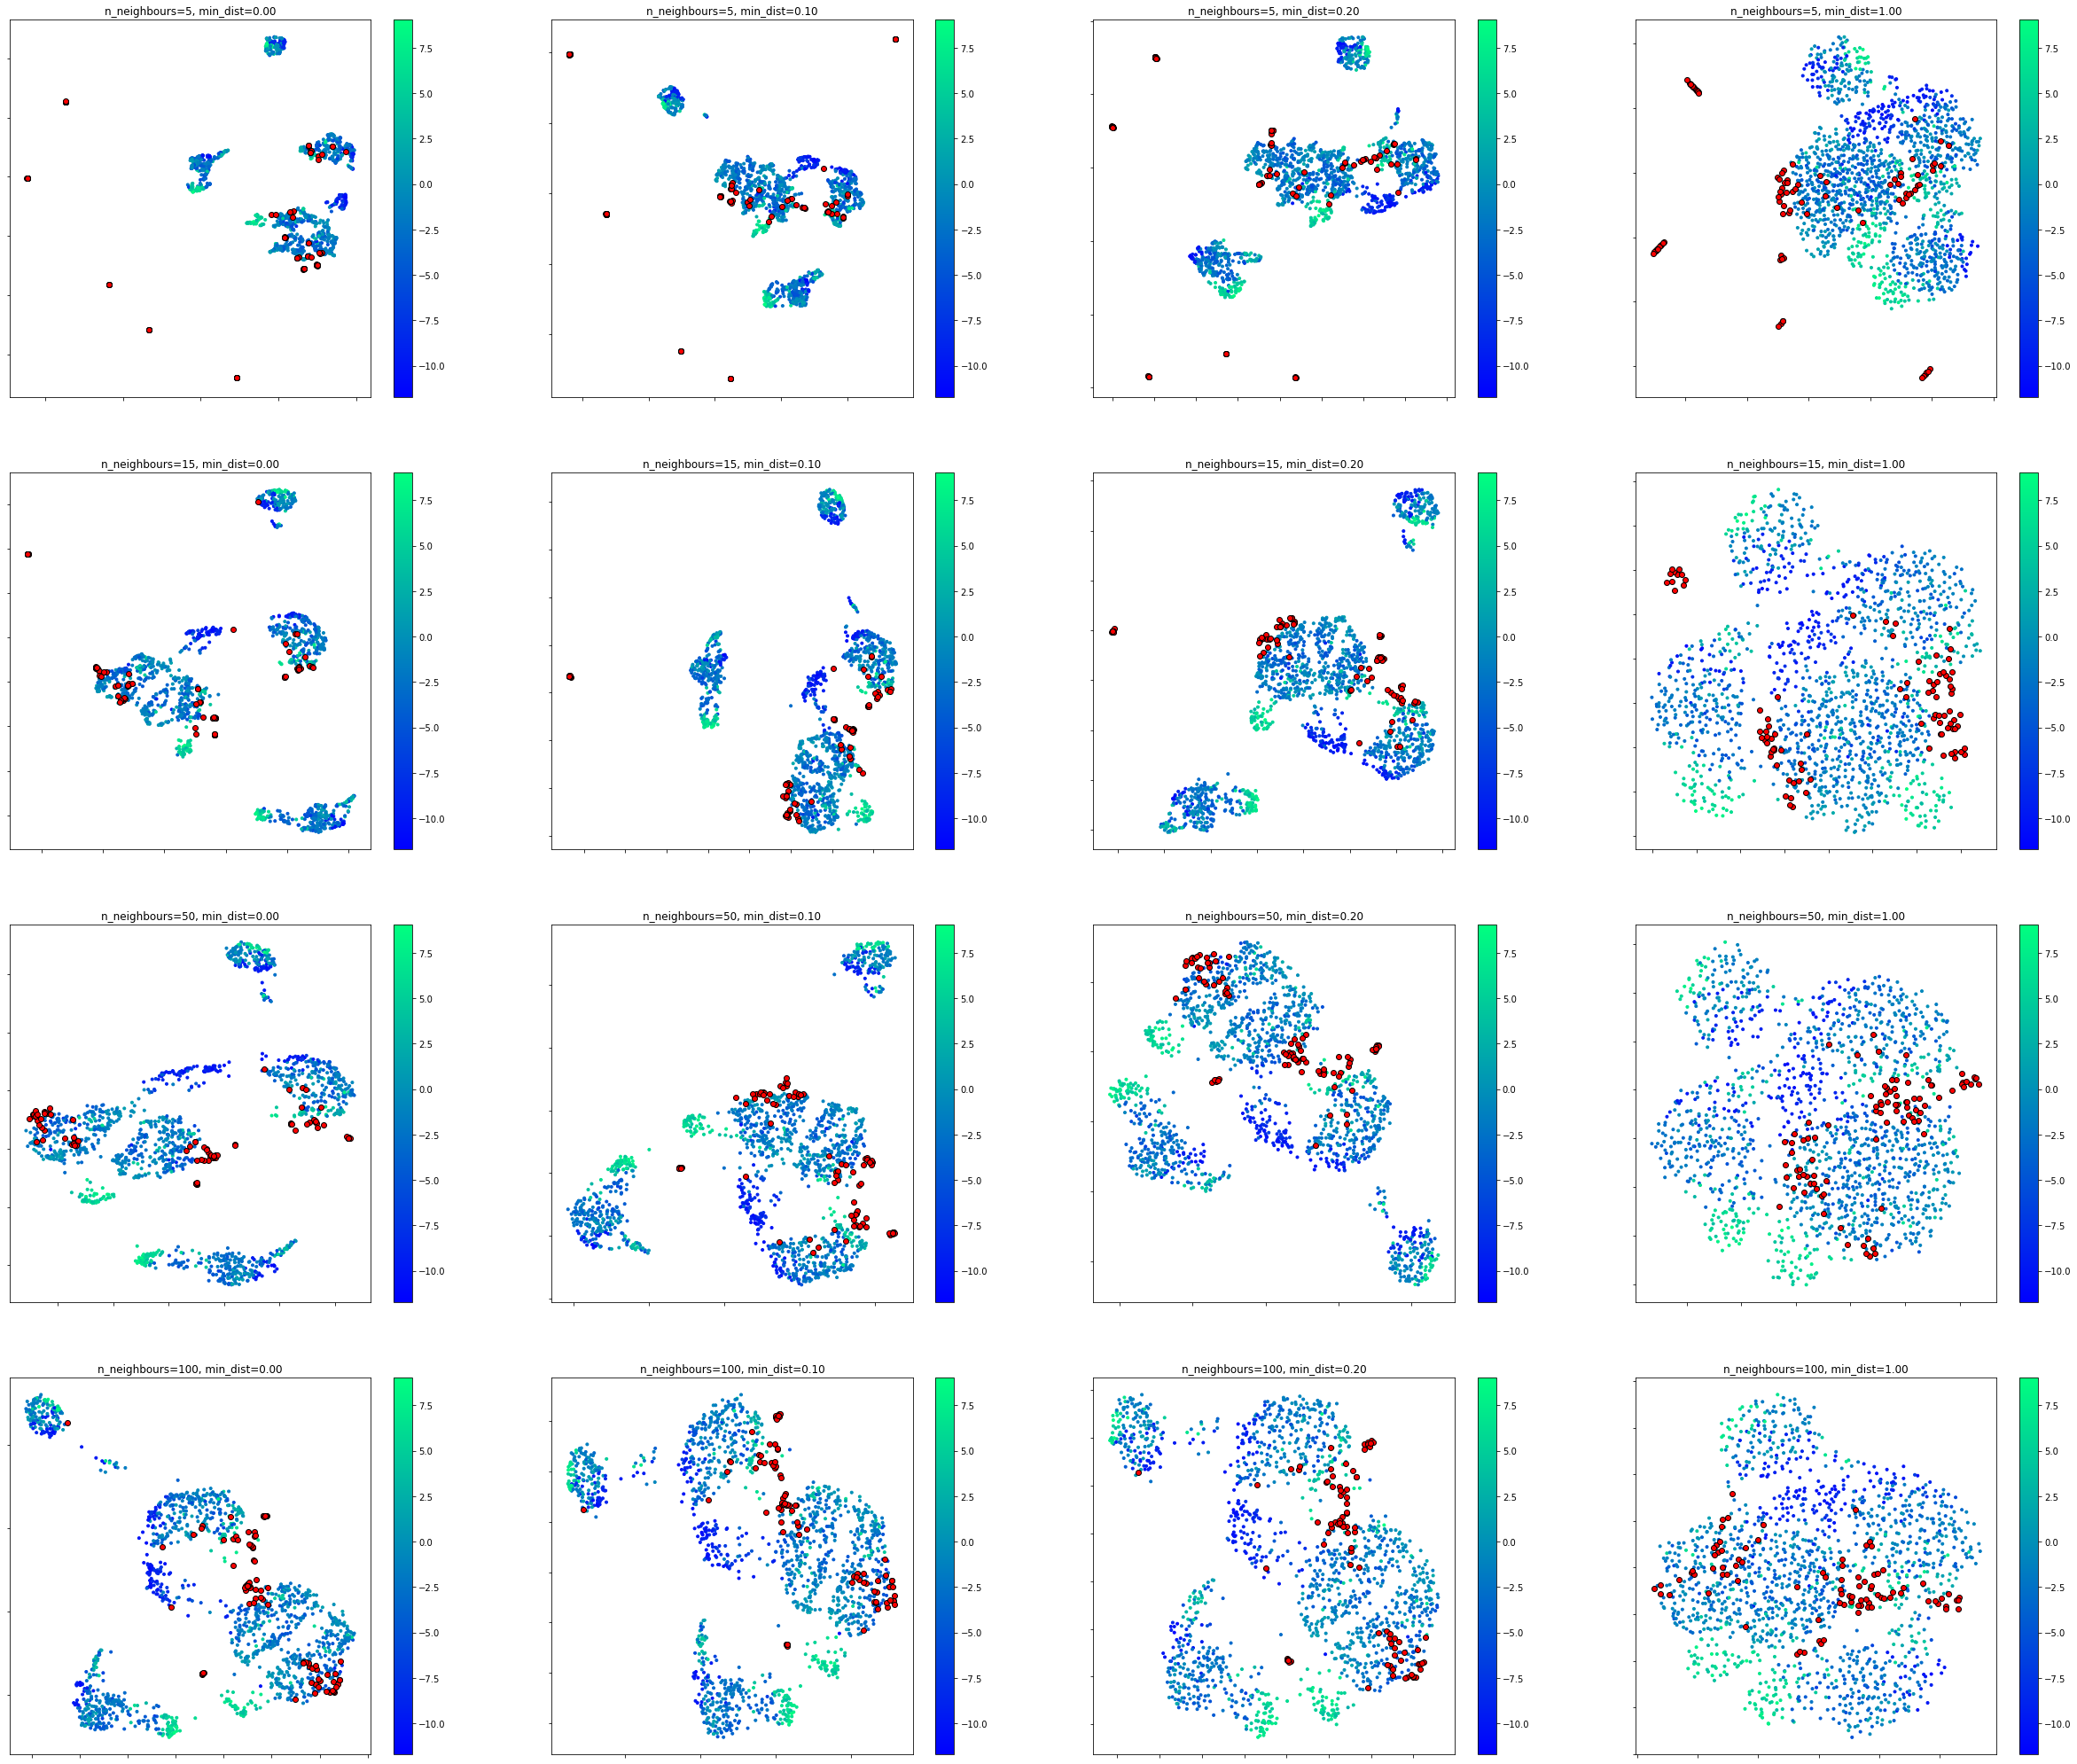

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(4,4,figsize=(42, 36))
for i in range(4):
    for j in range(4):
        p = n_neigh_list[i]
        l = min_dist_list[j]
        reducer = umap.UMAP(metric='precomputed', min_dist=l, n_neighbors=p, random_state=1, init='random')
        embedding = reducer.fit_transform(distance_matrix)
        all_features['emb_umap_x'] = embedding[:,0]
        all_features['emb_umap_y'] = embedding[:,1]
        dn = all_features.where(all_features.native != True).dropna()
        na = all_features.where(all_features.native == True).dropna()
        im = ax[i][j].scatter(dn.emb_umap_x, dn.emb_umap_y, c=dn.prot.values, marker='.', cmap='winter' )
        ax[i][j].scatter(na.emb_umap_x, na.emb_umap_y, marker='o', facecolors='red', edgecolors='black' )
        ax[i][j].title.set_text('n_neighbours=%d, min_dist=%0.2f'%(p,l))
        ax[i][j].set_yticklabels([])
        ax[i][j].set_xticklabels([])
        fig.colorbar(im, ax=ax[i][j])
plt.show()
plt.savefig('./explore_umap_embedding_protuberance_colors.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', transparent=True)

In [16]:
reducer = umap.UMAP(metric='precomputed',min_dist=0.2, n_neighbors=15, random_state=1, init='random')
embedding = reducer.fit_transform(distance_matrix)

In [17]:
all_features['emb_umap_x'] = embedding[:,0]
all_features['emb_umap_y'] = embedding[:,1]
all_features.tail()

shoot  short_arm  long_arm_ang       dist  base  \
den_ZLXCRACL  48.852833          1     48.193951  25.218239     5   
den_ZPKJGTUN  46.901508          1     44.582173  23.458285     5   
den_ZSGYHYVU  35.768540          1     55.989102  24.369879     5   
den_ZSLFGRXI  38.532080          1     54.351508  28.185086     5   
den_ZXIDTIFR  61.203019          1     35.740986  26.185375     5   

              main_bulge_curve  long_arm  sheet_type      prot  len  ...  H3  \
den_ZLXCRACL                 2         3          33 -1.808690  138  ...  15   
den_ZPKJGTUN                 3         3          41 -1.910742  126  ...  10   
den_ZSGYHYVU                 2         3          36 -2.932074  140  ...  15   
den_ZSLFGRXI                 2         3          36 -5.416544  123  ...  14   
den_ZXIDTIFR                 2         3          33 -1.001782  127  ...  14   

             hairpin  Opening_is_classic  has_cHelix  H1  type  \
den_ZLXCRACL       6                   1           1  23  1499   
den_ZPKJGTUN       6                   1           1  19  1500   
den_ZSGYHYVU       6                   1           1  23  1501   
den_ZSLFGRXI       4                   1           0  23  1502   
den_ZXIDTIFR       4                   1           1  19  1503   

              has_stable_member  has_tested_member  emb_umap_x  emb_umap_y  
den_ZLXCRACL              False              False   -4.302879   -5.113959  
den_ZPKJGTUN              False              False   -0.123887    1.736020  
den_ZSGYHYVU              False              False   -3.322705   -4.732146  
den_ZSLFGRXI              False              False   -5.079900   -5.757481  
den_ZXIDTIFR              False              False   -0.724540    1.749779  

[5 rows x 25 columns]

In [18]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

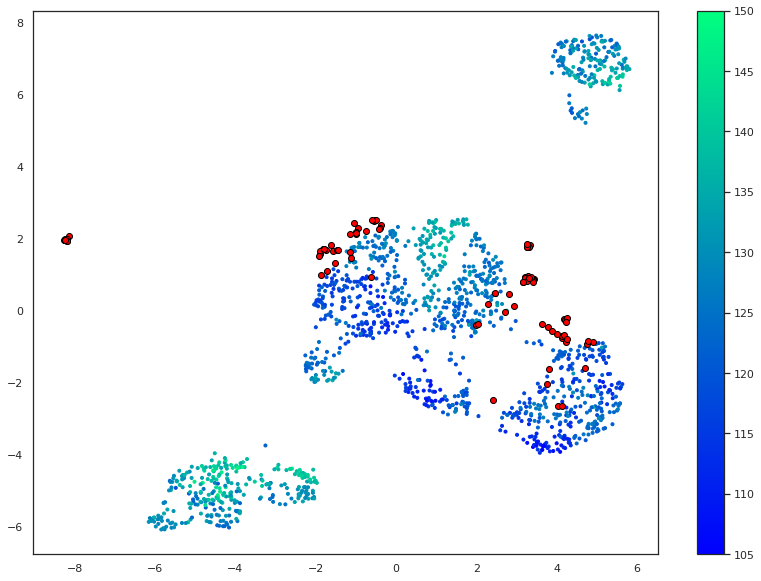

In [19]:
#all_features = pd.read_csv('stored_umap_embeddings.csv',index_col=0)

dn = all_features.where(all_features.native != True).dropna()
na = all_features.where(all_features.native == True).dropna()
plt.scatter(dn.emb_umap_x, dn.emb_umap_y, c=dn.len.values, marker='.', cmap='winter' )
plt.colorbar()
plt.scatter(na.emb_umap_x, na.emb_umap_y, marker='o', facecolors='red', edgecolors='black' )
plt.show()

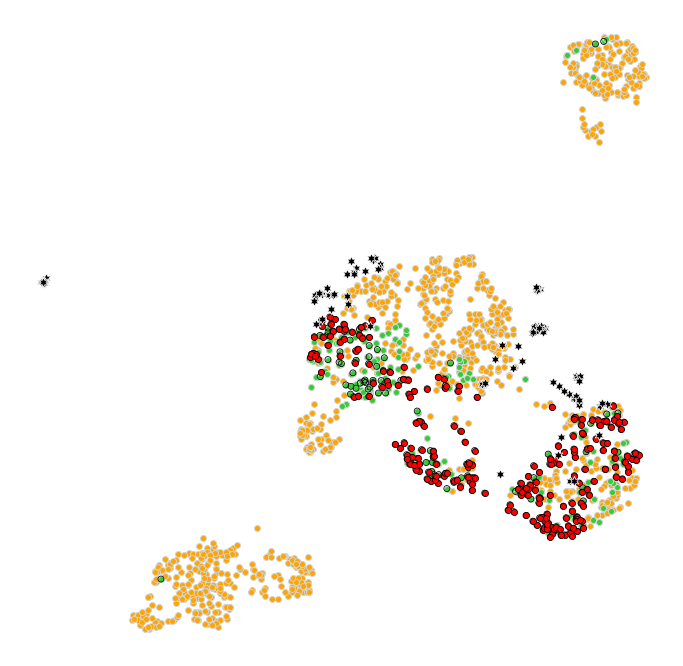

In [20]:
dn = all_features.where(all_features.native != True).dropna()
na = all_features.where(all_features.native == True).dropna()
plt.figure(figsize=(12,12))
plt.axis('off')
vmin = min(dn.len.values)
vmax = max(dn.len.values)
plt.scatter(dn.emb_umap_x, dn.emb_umap_y, c='orange', marker='o',edgecolors='lightgrey' )

#plt.colorbar()
plt.scatter(dn.where(dn.len<=120).dropna().emb_umap_x, \
            dn.where(dn.len<=120).dropna().emb_umap_y,\
            marker='o', facecolors='limegreen', edgecolors='lightgrey' )
plt.scatter(dn.where(dn.has_tested_member == True).dropna().emb_umap_x, \
            dn.where(dn.has_tested_member == True).dropna().emb_umap_y,\
            c='none',marker='o', facecolors='none', edgecolors='black',linewidth=0.75 )
plt.scatter(dn.where(dn.has_stable_member == True).dropna().emb_umap_x, \
            dn.where(dn.has_stable_member == True).dropna().emb_umap_y, vmin=vmin,\
            vmax=vmax, marker='o',facecolor='red'\
            , edgecolors='black',linewidth=0.75 )
plt.scatter(na.emb_umap_x, na.emb_umap_y, marker=(6,1,0), s=100, linewidth=0.75, facecolors='black', edgecolors='white' )
plt.savefig('./final_umap_embedding_v3.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', transparent=True)
plt.show()
#, linewidths=1.25

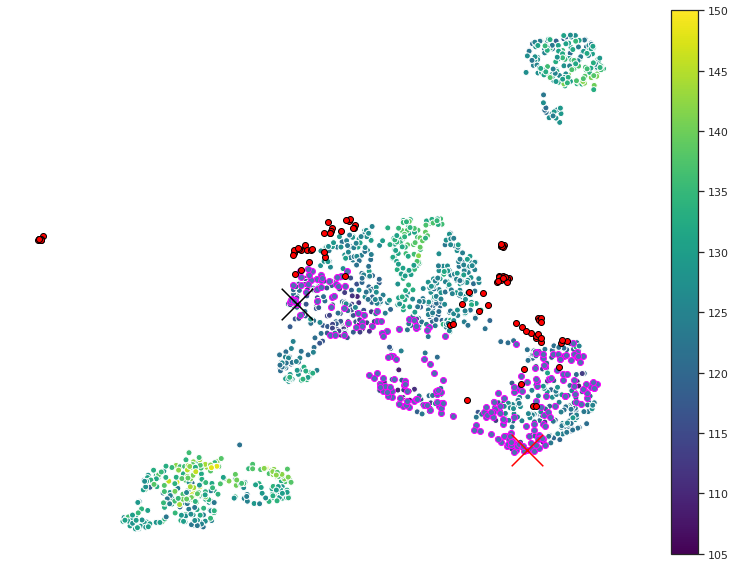

In [21]:
dn = all_features.where(all_features.native != True).dropna()
na = all_features.where(all_features.native == True).dropna()
plt.axis('off')
plt.scatter(dn.emb_umap_x, dn.emb_umap_y, c=dn.len.values, marker='o', cmap='viridis',edgecolors='white' )
plt.colorbar()
#plt.scatter(dn.where(dn.has_tested_member == True).dropna().emb_umap_x, \
#            dn.where(dn.has_tested_member == True).dropna().emb_umap_y,\
#            s=25, facecolors='none', edgecolors='magenta' )
plt.scatter(dn.where(dn.has_stable_member == True).dropna().emb_umap_x, \
            dn.where(dn.has_stable_member == True).dropna().emb_umap_y,\
             marker='o', cmap='viridis', edgecolors='magenta' )
plt.scatter(na.emb_umap_x, na.emb_umap_y, marker='o', facecolors='red', edgecolors='black' )
MC2_7_embadding=[[dn.loc['den_AJALODPD'].emb_umap_x],[dn.loc['den_AJALODPD'].emb_umap_y]]
plt.scatter(MC2_7_embadding[0],MC2_7_embadding[1], marker='x',c='black',s=1000, linewidths=10 )
CAV1_embadding=[[dn.loc['den_AAADACGD'].emb_umap_x],[dn.loc['den_AAADACGD'].emb_umap_y] ]
plt.scatter(CAV1_embadding[0],CAV1_embadding[1], marker='x',c='red',s=1000, linewidths=10 )
plt.show()
#, linewidths=1.25

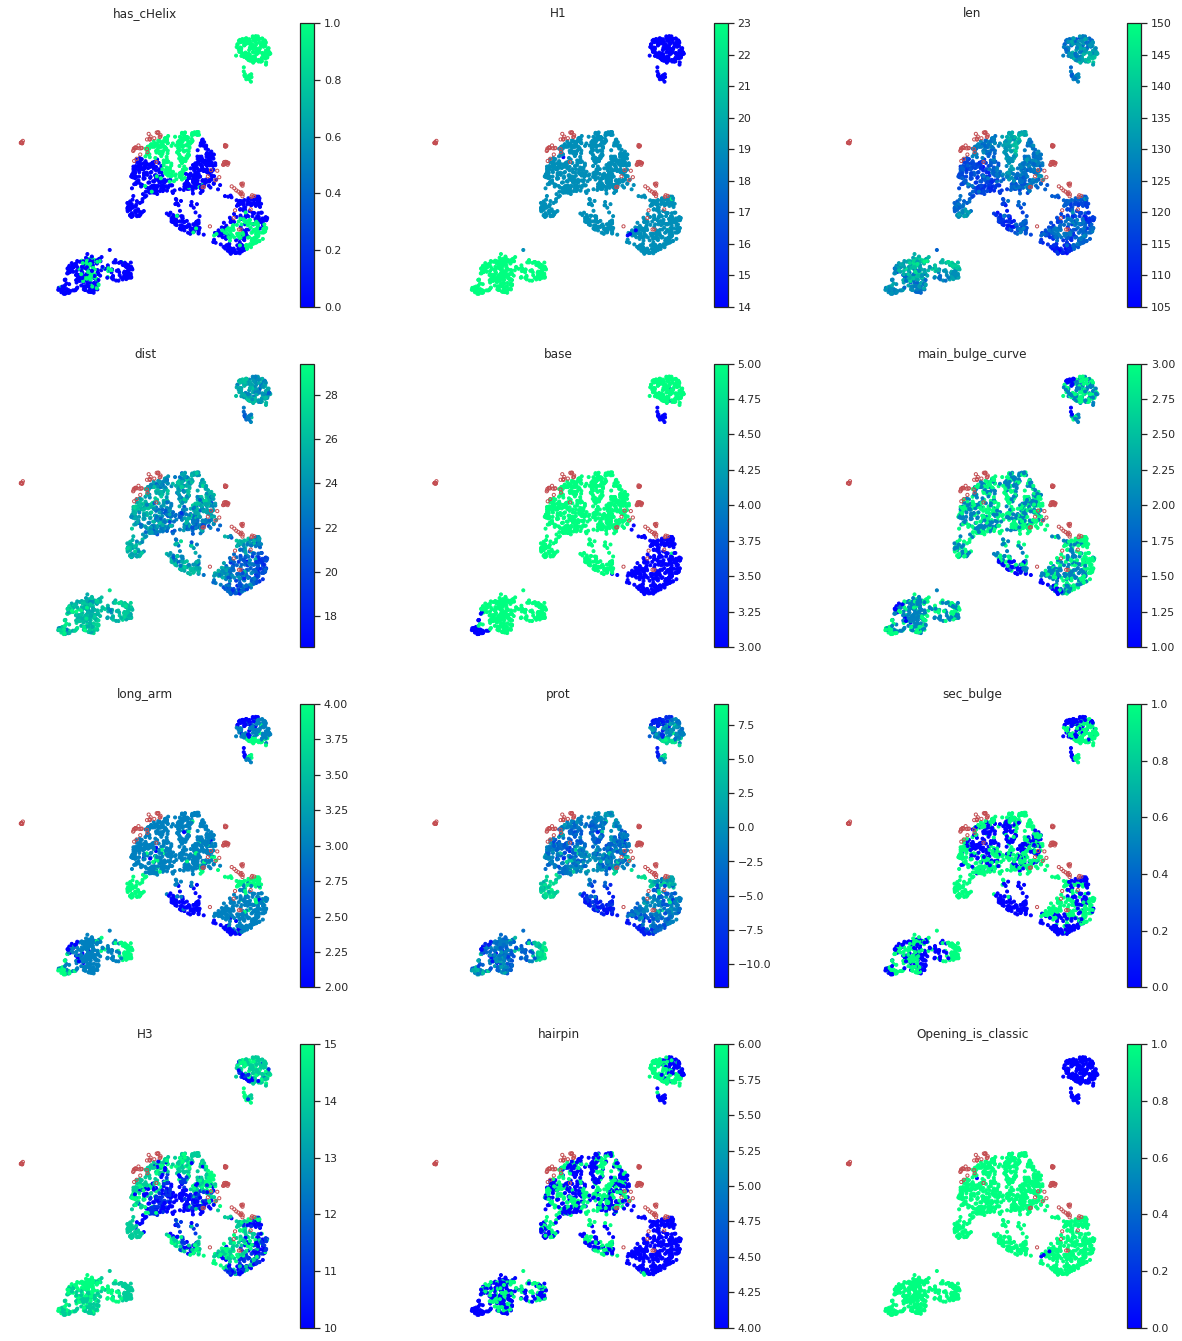

In [22]:
# "H3", "hairpin", "Opening_is_classic", "has_cHelix"
feat = np.array([["has_cHelix","H1","len"],
                  ["dist", "base", "main_bulge_curve"],
                  ["long_arm","prot","sec_bulge"],
                  ["H3","hairpin","Opening_is_classic"]])

dn = all_features.where(all_features.native != True).dropna()
na = all_features.where(all_features.native == True).dropna()
fig, ax = plt.subplots(4,3,figsize=(21, 24))
for i in range(4):
    for j in range(3):
        colors2 = dn[feat[i][j]].values
        vmin = min(colors2)
        vmax = max(colors2)
        im = ax[i][j].scatter(dn.emb_umap_x, dn.emb_umap_y, c=colors2,marker='.',  cmap='winter',vmin=vmin,vmax=vmax)
        ax[i][j].scatter(na.emb_umap_x, na.emb_umap_y, s=10, facecolors='none', edgecolors='r', linewidths=1.0 )
        fig.colorbar(im, ax=ax[i,j])
        ax[i][j].axis('off')
        ax[i][j].title.set_text(feat[i][j])
plt.savefig("./UMAP_3by4_FEATURES.png",dpi=300)
plt.show()